<a href="https://colab.research.google.com/github/saptaksubhra/Classification-ML-Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Final_Notebook_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# Problem Statement: Increase The Effectiveness of The Bank's Telemarketing Campaign

Let's include the troop of soldiers first to embattle this war.

In [1]:

# Importing Required libraries at the outset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Prepartion:

# Loading Dataset

In [2]:
# Mounting Google Drive to have access to the dataset of the Portuguese banking institution

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Loading the dataset of the Portuguese banking institution

df_PortugueseBank = pd.read_csv('/content/drive/MyDrive/Almabetter Capstone Projects-Saptaksubhra Bhattacharyya/Classification ML Project-Bank Marketing Effectiveness Prediction-Saptaksubhra Bhattacharyya/bank-full.csv', sep = ';')

In [22]:
df_PortugueseBank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [23]:
# Let's see number of rows and number of columns in the dataset.

df_PortugueseBank.shape


(45211, 17)

In [24]:
# The whole of of the dataset.

df_PortugueseBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [25]:
# Let's have a look at the Statistical description of the dataset.

df_PortugueseBank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [26]:
# Let's see if there is any missing value in the dataset itself.

df_PortugueseBank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

It is evident from the above observation that there is no missing value available in the dataset.

In [27]:
# Before going further into analysis, let's make a copy of the original dataset as per the statndard practice.

df_PortugueseBank_copy = df_PortugueseBank.copy()

# Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


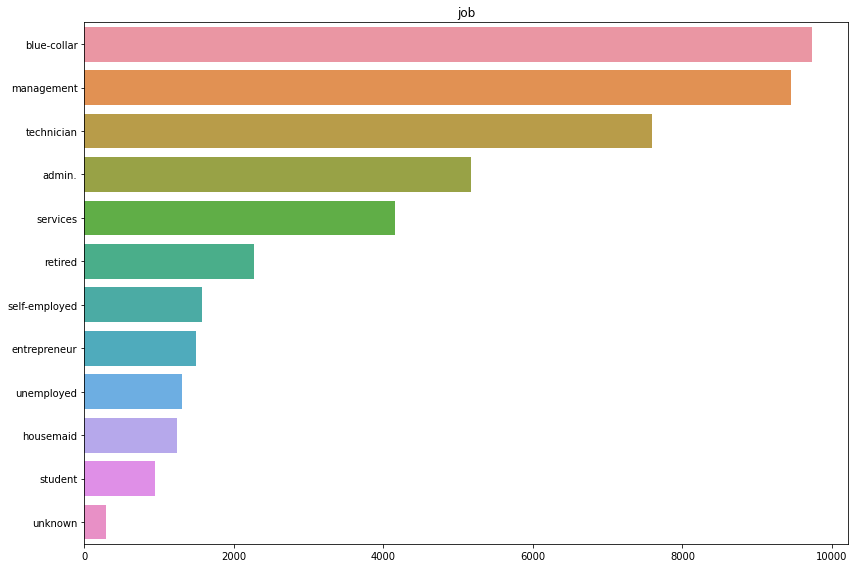

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


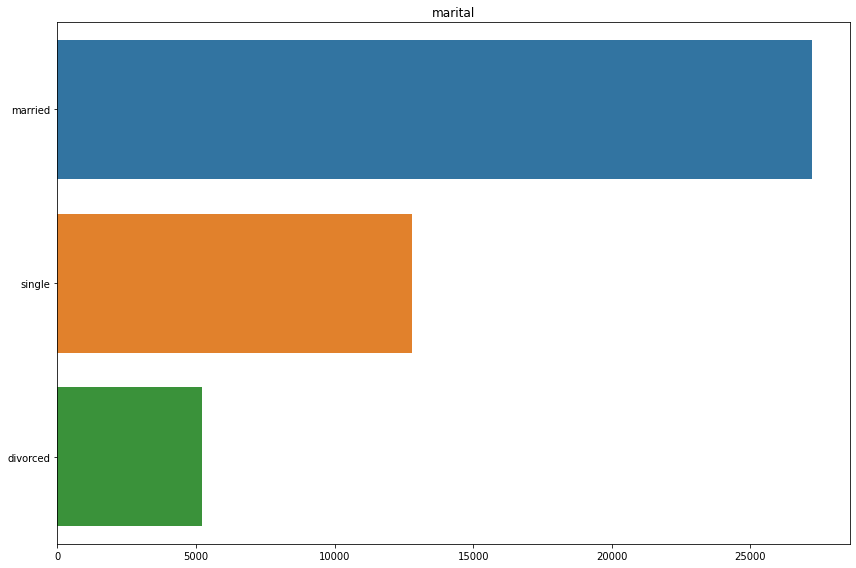

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


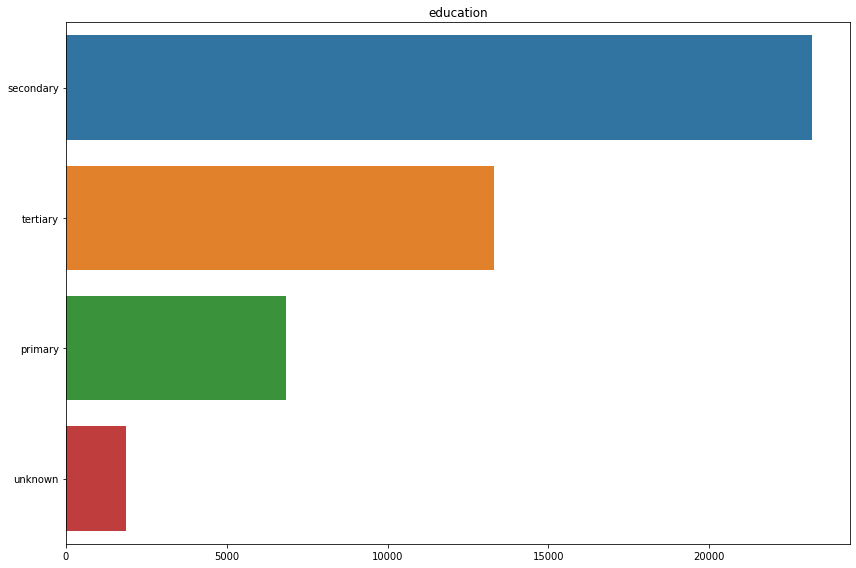

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


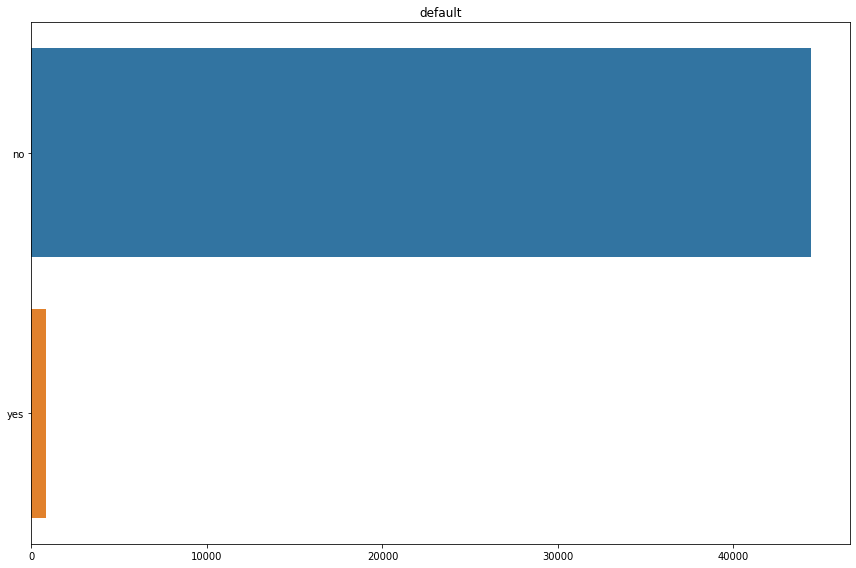

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


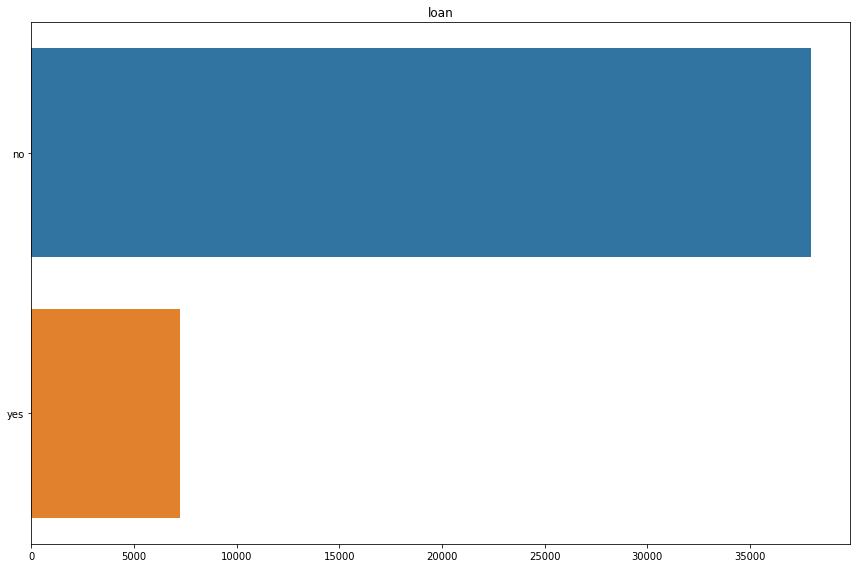

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


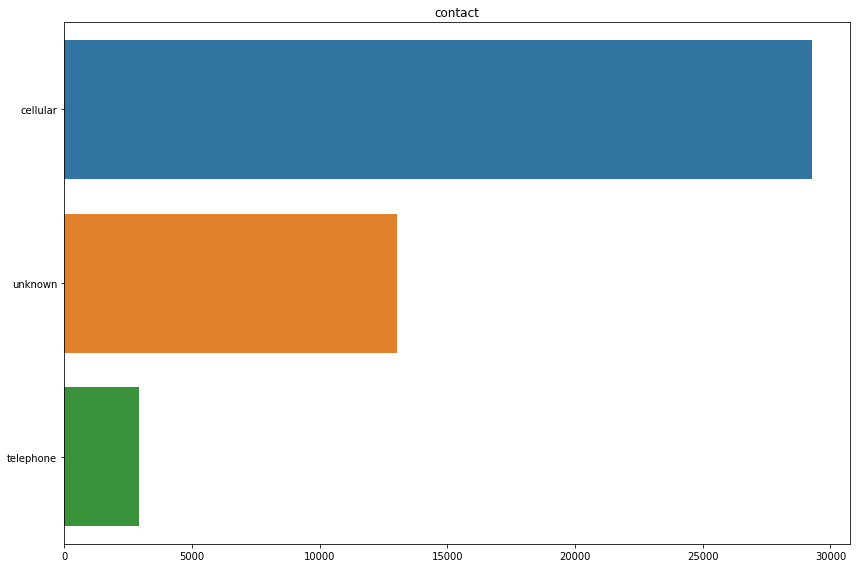

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


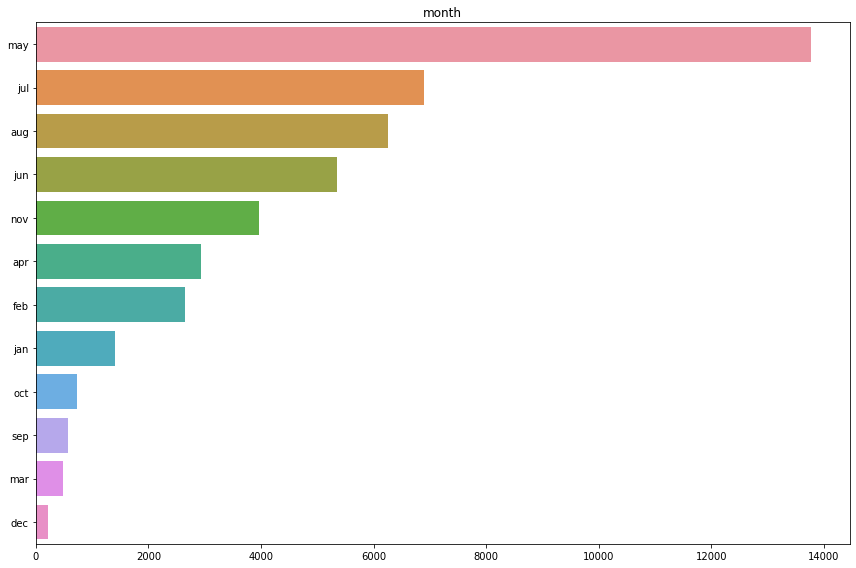

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


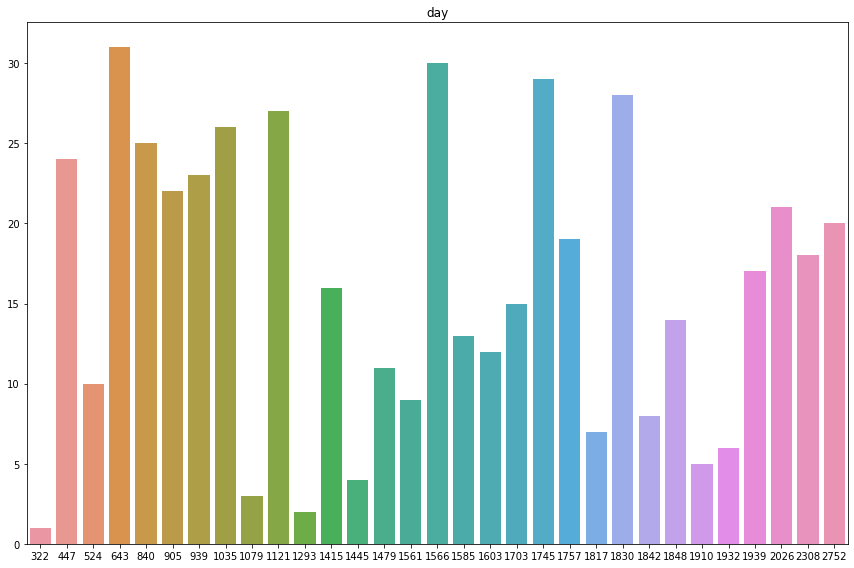

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


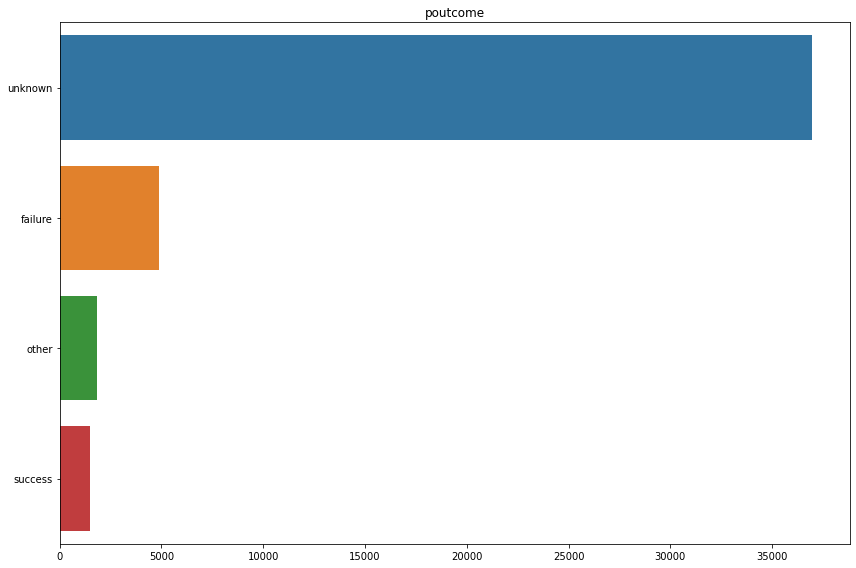

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


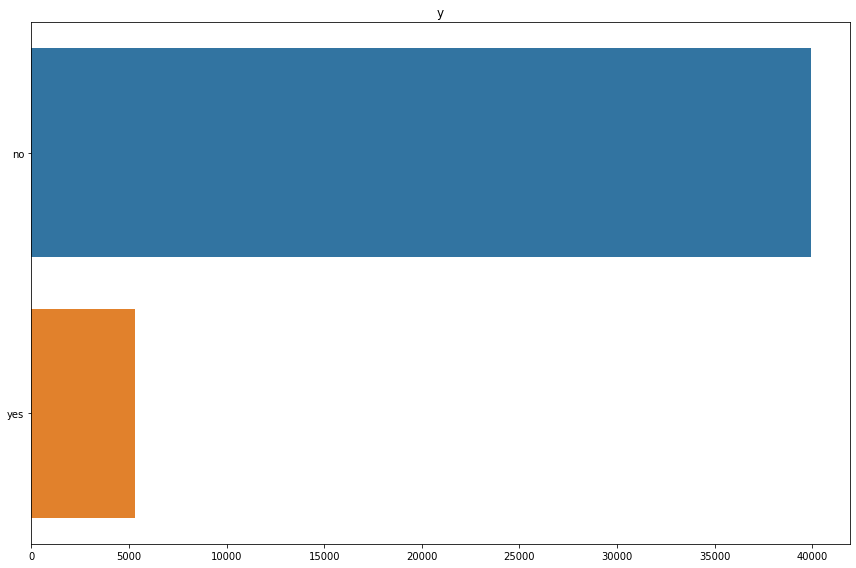

In [28]:
# Let's deep dive into categoreical variables in terms of data visualization of the dataset.

cat_vars = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome', 'y']

# Let's run the for loop to go through all the categorical variables to have a better visualization of each categorical variable.

for col in cat_vars:
  plt.figure(figsize = (12,8))
  sns.barplot(df_PortugueseBank_copy[col].value_counts().values, df_PortugueseBank_copy[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()
  plt.show()

# Observations:

From above bar plots, it can be observed that

* There are 45211 rows and 17 columns.

* No missing values

* There are unknown values for many variables in the Data set.

* Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'.

# Correlation Matrix of Numerical Features

In [29]:
# Converting the target variable 'y' into muemrical feature
# Considering 'no' as 0 and 'yes' as 1.

df_PortugueseBank_copy.y = df_PortugueseBank_copy.y.map({'yes' : 1, 'no' : 0}).astype('uint8')

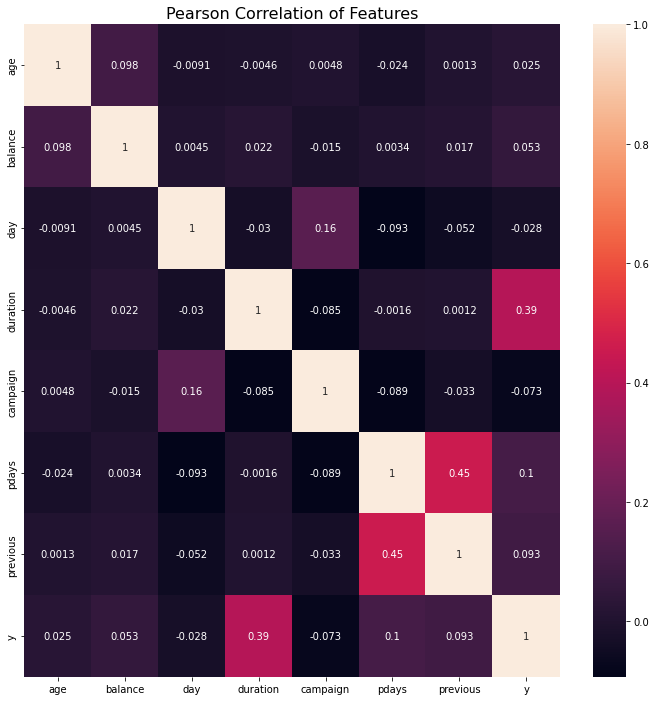

In [30]:
Correlation = df_PortugueseBank_copy.corr()

f, ax = plt.subplots(figsize = (12,12))
sns.heatmap(Correlation, ax = ax, annot = True)
plt.title('Pearson Correlation of Features', size = 16)
plt.show()

It is crystal clear from the above corelation heatmap that the output feature 'y' is not highly correlated to any variable.

In [31]:
# Dropping off 'marital' and 'contact' columns as those two columns are of no use in the dataset itself.

df_PortugueseBank_copy.drop(['marital'], axis = 1, inplace = True)
df_PortugueseBank_copy.drop(['contact'], axis = 1, inplace = True)

In [34]:
# Let's see after dropping those two columns ("marital" and 'contact'), how the new dataset looks like.

df_PortugueseBank_copy.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


# Conversion of Categorical Variables into Numerical

Now, we need to convert all categorical features into numerical for the sake of analysis.

In [36]:
# Converting 'yes' into '1' and 'no' into '0' for columns 'default', 'housing', 'loan' first.

df_PortugueseBank_copy[['default', 'housing', 'loan']] = df_PortugueseBank_copy[['default', 'housing', 'loan']].replace(['yes', 'no'], ['1', '0'])

In [37]:
# Column ' month' consists of 12 months as 'Jjan', 'feb', 'mar' up to 'dec'.
# Replacing 'jan', 'feb' and so on as '1', '2' respectively.


df_PortugueseBank_copy['month'] = df_PortugueseBank_copy['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                                                                          ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])


In [38]:
# And lastly replacing 'unknown' with 'other as job category or designation in 'job' column as 'unknown' will not be handful meaning as far as further analysis is concerned.

df_PortugueseBank_copy['job'] = df_PortugueseBank_copy['job'].replace(['unknown'], ['other'])

In [39]:
# Now let's have a look the new form of the dataset fater so many replacements.

df_PortugueseBank_copy

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,0,825,0,0,17,11,977,3,-1,0,unknown,1
45207,71,retired,primary,0,1729,0,0,17,11,456,2,-1,0,unknown,1
45208,72,retired,secondary,0,5715,0,0,17,11,1127,5,184,3,success,1
45209,57,blue-collar,secondary,0,668,0,0,17,11,508,4,-1,0,unknown,0


# Implementation of Label Encoder

First of all, Lable Encoding will be applied on 'job', 'education', and 'poutcome' column as far as our data analysis is concerned.

In [40]:
# Applying Lable Encoding on the above mentioned three columns.

from sklearn.preprocessing import LabelEncoder
Lab_Enco = LabelEncoder()
df_PortugueseBank_copy['job'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['job'])
df_PortugueseBank_copy['education'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['education'])
df_PortugueseBank_copy['poutcome'] = Lab_Enco.fit_transform(df_PortugueseBank_copy['poutcome'])

In [41]:
# The new dataset after the implementation of Label Encoding on the above mentioned three columns.

df_PortugueseBank_copy

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,2,0,825,0,0,17,11,977,3,-1,0,3,1
45207,71,6,0,0,1729,0,0,17,11,456,2,-1,0,3,1
45208,72,6,1,0,5715,0,0,17,11,1127,5,184,3,2,1
45209,57,1,1,0,668,0,0,17,11,508,4,-1,0,3,0


# Detection of Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


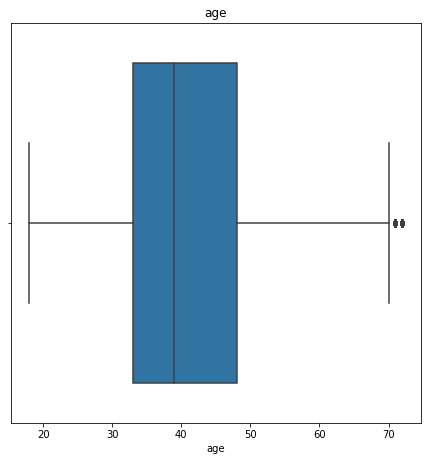

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


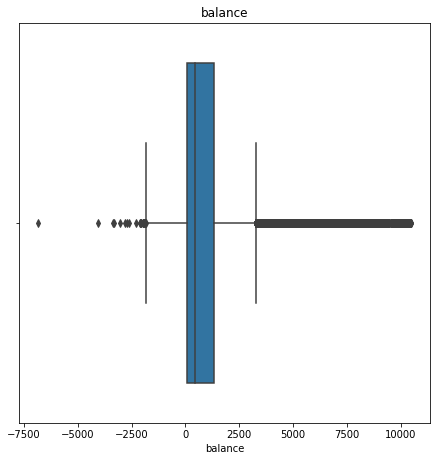

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


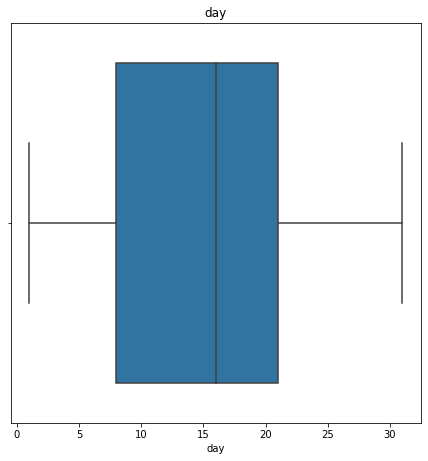

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


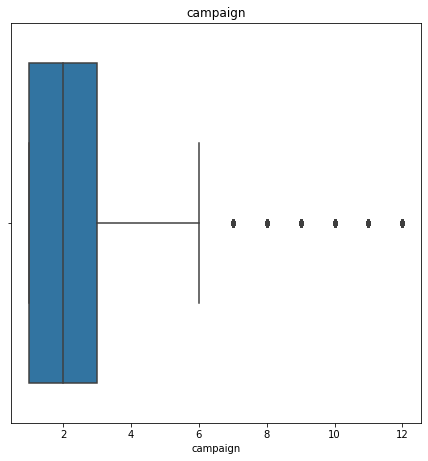

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


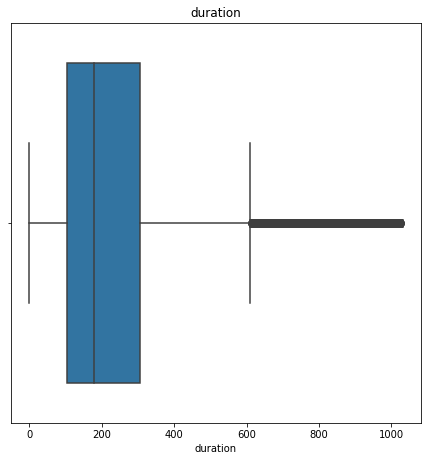

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


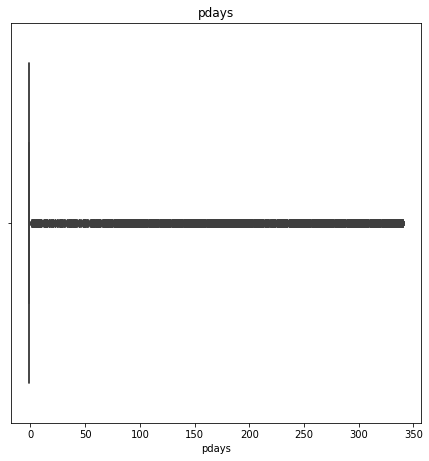

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


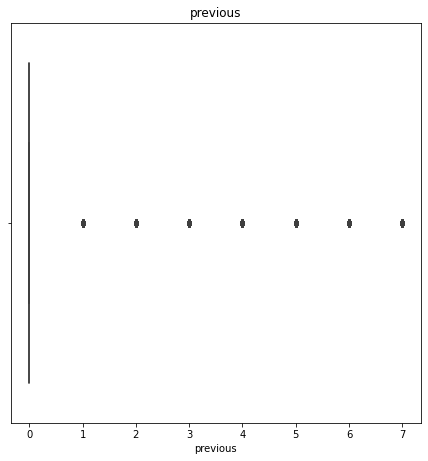

In [49]:
# Let's detect whether some outliers are available or not in the dataset.

try:

  columns = df_PortugueseBank_copy[['age','balance','day','campaign','duration','pdays','previous']]

  for column in columns:

   n = 0
   plt.figure(figsize = (25,25))
   plt.subplot(3,3,1)
   sns.boxplot(df_PortugueseBank_copy[column])
   plt.title(column)
   plt.show()
   n = n + 1
except:
  print('The Detection of Outliers')

From above boxplots, it is evident that outliers are existing in the dataset. Those outliers will have to be removed as far as the data cleaning is concerned because data cleaning will play a crucial role in providing a better accuracy of any model.

z-score is one of the methods by which outliers will be removed from dataset. Let's do it then.

In [44]:
# Let's implement z-score to remove outliers.

from scipy import stats
z = np.abs(stats.zscore(df_PortugueseBank_copy[['age','balance','day','campaign','duration','pdays','previous']]))
print(z)
df_PortugueseBank_copy = df_PortugueseBank_copy[(z < 3).all(axis = 1)]
df_PortugueseBank_copy.shape

            age   balance       day  campaign  duration     pdays  previous
0      1.606965  0.256419  1.298476  0.569351  0.011016  0.411453  0.251940
1      0.288529  0.437895  1.298476  0.569351  0.416127  0.411453  0.251940
2      0.747384  0.446762  1.298476  0.569351  0.707361  0.411453  0.251940
3      0.571051  0.047205  1.298476  0.569351  0.645231  0.411453  0.251940
4      0.747384  0.447091  1.298476  0.569351  0.233620  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  0.143418  0.076230  2.791329  0.411453  0.251940
45207  2.831227  0.120447  0.143418  0.246560  0.768224  0.411453  0.251940
45208  2.925401  1.429593  0.143418  0.721811  3.373797  1.436189  1.050473
45209  1.512791  0.228024  0.143418  0.399020  0.970146  0.411453  0.251940
45210  0.370689  0.528364  0.143418  0.246560  0.399328  1.476138  4.523577

[45211 rows x 7 columns]


(40209, 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


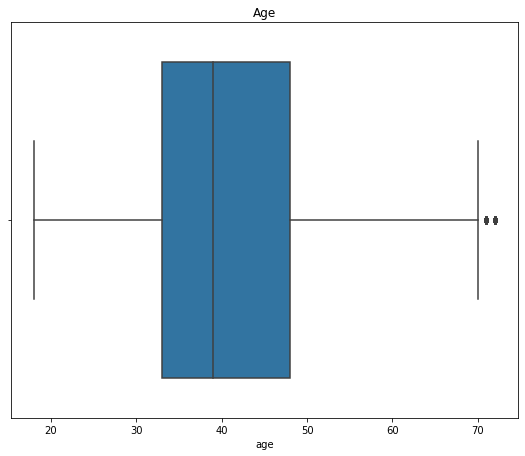

In [47]:
# Checking whether the outliers are removed or not in reality.

plt.figure(figsize = (20,16))
plt.subplot(2,2,1)
sns.boxplot(df_PortugueseBank_copy['age'])
plt.title('Age')
plt.show()

# The Separation of Independent and Dependent Variable

In [50]:
# Defining x and y axis as independent and dependent variable respectively.

x = df_PortugueseBank_copy.drop(['y'], axis = 1) # Dropping off 'y' column as it is the dependent variable and the rest all independent variables are existing.

y = df_PortugueseBank_copy['y'] # As 'y' being the dependent or outpouyt varaiable in the dataset.

df_PortugueseBank_copy['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

# Handling Imbalanced Dataset

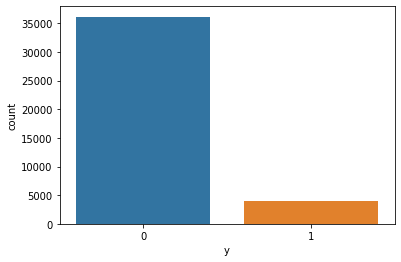

In [52]:
# By using countplot, imbalanced dataset will be handled.

sns.countplot(x = 'y', data = df_PortugueseBank_copy)

The definition of imbalanced data says that when observation in one class is higher than in other classes then it can be said that there exists a class imbalance. And it is not obscure from the above graph that there exists a huge difference between the dataset.

To sort out this issue, re-sampling technique will be utilised.